## Bra and Ket Definitions

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# Triangulo de Heisenberg

Sistema de 3 spines $\frac{1}{2}$ con un Hamiltoniano:

$$H = J (\vec{S}_1\vec{S}_2 + \vec{S}_1\vec{S}_3 + \vec{S}_2\vec{S}_3)$$

Calcular los autovalores y la degenración correspondiente.

Generamos el momento total $\vec{S} = \vec{S}_1 + \vec{S}_2 + \vec{S}_3$. Desarrollando el cuadrado de $\vec{S}$ que:


$$H = J (\vec{S}_1\vec{S}_2 + \vec{S}_1\vec{S}_3 + \vec{S}_2\vec{S}_3) = \frac{J}{2} \left(\vec{S}^2 -\sum_{i=1}^3 \vec{S}^2_i \right)$$

Suponemos primero que: $[H, \vec{S}^2] = [H, \vec{S}_i^2] = [\vec{S}^2, \vec{S}_i^2]=0 \; \forall i$. Es decir $H, \vec{S}^2, \vec{S}_i^2 \; \forall i$ forman un conjunto de observables que conmutan. Implicación directa:

$$\vec{S}^2 \ket{s;s_1,s_2,s_3} = s(s+1) \ket{s;s_1,s_2,s_3}$$
$$\vec{S}_i^2 \ket{s;s_1,s_2,s_3} = s_i(s_i+1) \ket{s;s_1,s_2,s_3}$$
$$H \ket{s;s_1,s_2,s_3} = E \ket{s;s_1,s_2,s_3}$$


Donde $s_i = \frac{1}{2} \forall i$. EL Hamiltoniano resultante será:

$$H = \frac{J}{2} \left( s(s+1) -\sum_{i=1}^3 s_i(s_i+1) \right)=  \frac{J}{2} \left( s(s+1) - \sum_{i=1}^3 \frac{1}{2}(\frac{1}{2} + 1)\right) =\frac{J}{2} \left( s(s+1) - \frac{9}{4}\right)$$

¿Cuanto vale $S$?

Tenemos que sumar los 3 spines correspondientes. 
Sumar dos spines funciona del siguiente modo:

$$s = s_1 \otimes s_2 = |s_1-s_2| \oplus |s_1-s_2| +1 \oplus \cdots \oplus s_1+s_2$$

Para nuestro caso:

$$s = \frac{1}{2} \otimes \frac{1}{2} \otimes \frac{1}{2} = (0 \oplus 1) \otimes \frac{1}{2} = (\frac{1}{2} \oplus \frac{1}{2} \oplus  \frac{3}{2})$$

Es decir realmente tendremos los dos siguientes autoestados;

$$\ket{s;s_1,s_2,s_3} = \ket{\frac{1}{2}; \frac{1}{2}, \frac{1}{2}, \frac{1}{2}}$$ (aparecerá dos veces) y 

$$\ket{s;s_1,s_2,s_3} = \ket{\frac{3}{2}; \frac{1}{2}, \frac{1}{2}, \frac{1}{2}}$$. 


Así pues sustituyendo $s=\frac{1}{2}$

$$H \ket{\frac{1}{2}; \frac{1}{2}, \frac{1}{2}, \frac{1}{2}} = -\frac{3}{4}J \ket{\frac{1}{2}; \frac{1}{2}, \frac{1}{2}, \frac{1}{2}}$$

y sutituyendo  $s=\frac{3}{2}$

$$H \ket{\frac{3}{2}; \frac{1}{2}, \frac{1}{2}, \frac{1}{2}} = \frac{3}{4}J \ket{\frac{3}{2}; \frac{1}{2}, \frac{1}{2}, \frac{1}{2}}$$

Además como sabemos para un momento angular $s$ existen las siguientes componentes que compartirán la misma energía; 
$$s_z = -|s|, -|s| +1, \cdots, s$$

Esto implica que para $s=\frac{1}{2}$ y $E=-\frac{3}{4}J$ tendremos dos posibles $s_z= \{-\frac{1}{2}, \frac{1}{2} \}$. Como además hay dos posibles momentos de $s=\frac{1}{2}$ la degeneración será de **4**


Para  $s=\frac{3}{2}$ y $E=\frac{3}{4}J$ tendremos **4** posibles $s_z= \{-\frac{3}{2}, -\frac{1}{2}, \frac{1}{2}, \frac{3}{2} \}$

## 1. Codigo Directo

Vamos a hacer la implementación más directa. Esto hay que hacerlo con un poco de cuidado:

$$\vec{S}_1 = s_x \otimes I_2 \otimes I_3 \hat{x} + s_y \otimes I_2 \otimes I_3 \hat{y}+ s_z \otimes I_2 \otimes I_3 \hat{z}$$

$$\vec{S}_2 = I_1 \otimes s_x \otimes I_3 \hat{x} + I_1 \otimes s_y \otimes I_3 \hat{y}+ I_1 \otimes s_z \otimes I_3 \hat{z}$$

$$\vec{S}_1 \vec{S}_2  = s_x \otimes s_x \otimes I_3 + s_y \otimes s_y \otimes I_3 + s_z \otimes s_z \otimes I_3 $$

Esto se aplica tambien a los otros dos productos!

In [ ]:
import numpy as np
import functools as ft
from sympy import Matrix, init_printing
init_printing()

In [ ]:
#identidad
I = np.identity(2)
sx = 0.5* np.array([[0, 1], [1, 0]])
sy = 0.5 * np.array([[0, -1j], [1j, 0]])
sz = 0.5 *  np.array([[1, 0], [0, -1]])

In [ ]:
s1s2 = ft.reduce(np.kron, [sx, sx, I]) +ft.reduce(np.kron, [sy, sy, I]) + ft.reduce(np.kron, [sz, sz, I])
s2s3 = ft.reduce(np.kron, [I, sx, sx]) +ft.reduce(np.kron, [I, sy, sy]) + ft.reduce(np.kron, [I, sz, sz])
s1s3 = ft.reduce(np.kron, [sx, I, sx]) +ft.reduce(np.kron, [sy, I, sy]) + ft.reduce(np.kron, [sz, I, sz])
H = s1s2 + s2s3 + s1s3
eigv = np.linalg.eigvalsh(H)

In [ ]:
eigv

## 2 Operadores Creación-Aniquilación.

El mismo sistema se puede resolver utilizando spinores y operadores de creación-aniquliación:

$$\vec{S} = 
\begin{pmatrix}
    S_+/\sqrt{2} \\
    S_z \\
    S_-/\sqrt{2} \\
\end{pmatrix}
$$

En este caso el producto tensorial lo podríamos poner como una suerte de producto escalar:


$$
\vec{S}_1^T \vec{S}_2 = 
\begin{pmatrix}
    S_-^1/\sqrt{2}  & S^1_{z} & S^1 _+/\sqrt{2} \\
\end{pmatrix}
\begin{pmatrix}
    S^2_+/\sqrt{2} \\
    S^2_z \\
    S^2_-/\sqrt{2} \\
\end{pmatrix}= \\
=\frac{S^1_{-} \otimes S^1_+}{2} + S^1_z \otimes S^2_z + \frac{S^1_+ \otimes S^2_-}{2}=
S^1_x \otimes S^2_x + S^1_y \otimes S^2_y + S^1_z\otimes S^2_z
$$

In [ ]:
I = np.identity(2)
S_z = 0.5 *  np.array([[1, 0], [0, -1]])
S_plus = np.array([[0, 1.0/np.sqrt(2)], [0 ,0]] )
S_less = S_plus.T

In [ ]:
S1S2 = np.kron(S_less, S_plus) + np.kron(S_z, S_z) + np.kron(S_plus, S_less)
S1S2I3 = np.kron(S1S2, I)
S1I2S3 = np.kron(np.kron(S_less, I), S_plus) + np.kron(np.kron(S_z, I), S_z) + np.kron(np.kron(S_plus, I), S_less)
I1S2S3 = np.kron(np.kron(I, S_less), S_plus) + np.kron(np.kron(I, S_z), S_z) + np.kron(np.kron(I, S_plus), S_less)

In [ ]:
H = S1S2I3 + S1I2S3 + I1S2S3

In [ ]:
eigv = np.linalg.eigvalsh(H)

In [ ]:
eigv

## 2 . Tensor Network mode

Vamos a representar el spinor como un tensor de rank-2:

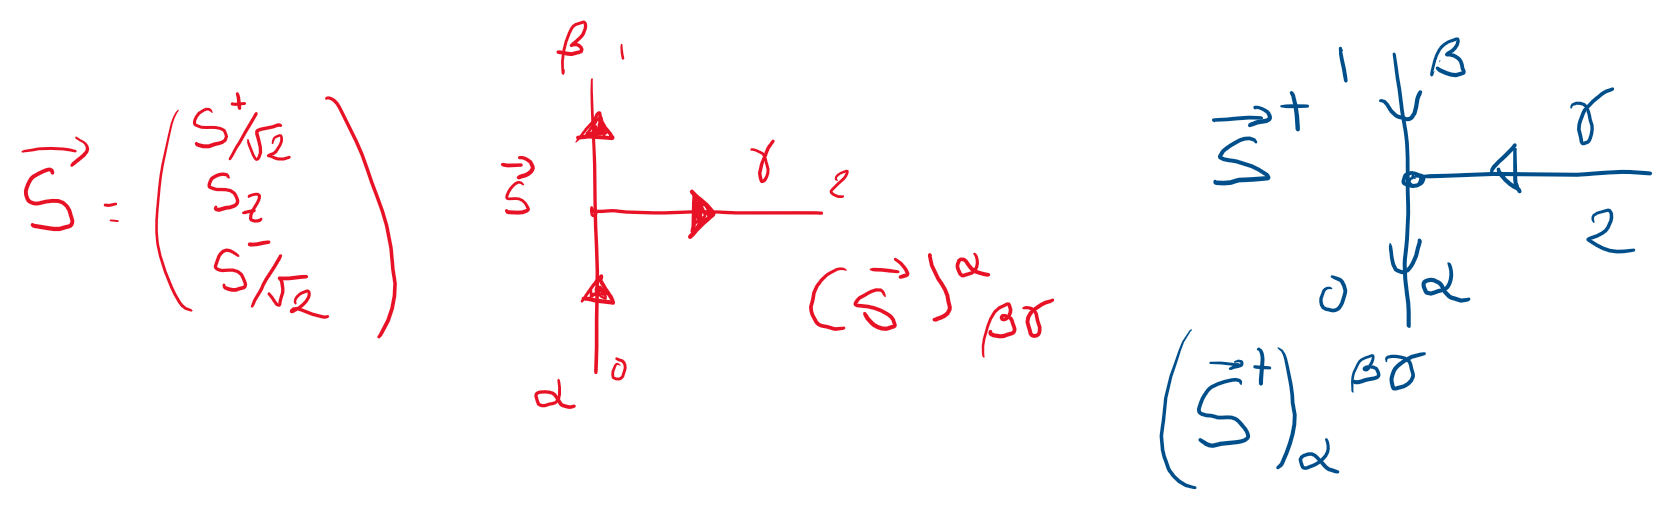

El primer superíndice ($\alpha$ para $\vec{S}$ y $\beta$ para $\vec{S}^{\dagger}$) mueve las columnas de la matriz. Mientras que el primer sub-índice mueve las filas ($\beta$ para $\vec{S}$ y $\alpha$ para $\vec{S}^{\dagger}$) de la matriz. Los números muestran cual sería el orden de indexado de un array numpy

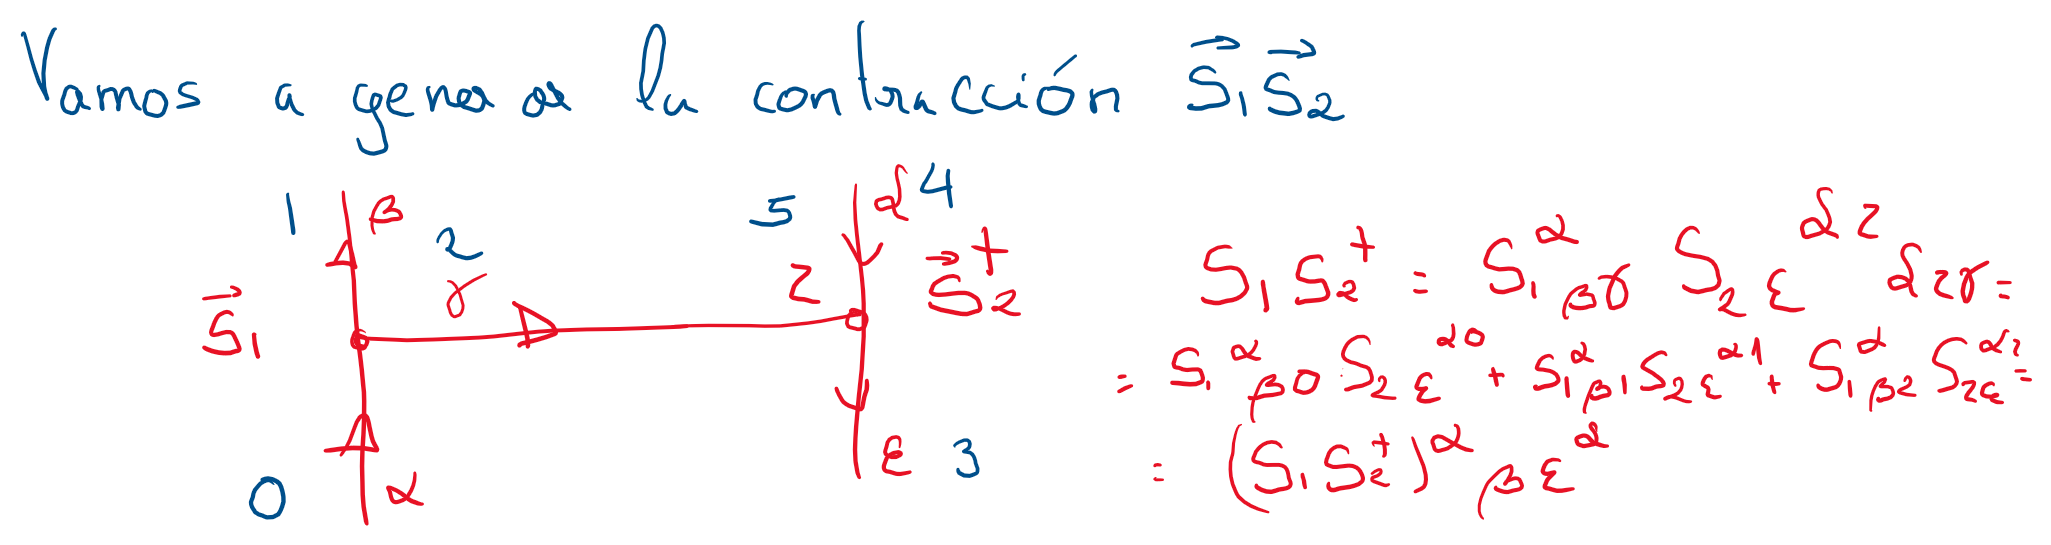

La contracción de $\vec{S}_1$ y $\vec{S}_2^{\dagger}$ en los índices $\gamma$ y $\tau$ (índices 2 y 5) da lugar a un tensor de rank-4 del siguiente modo:

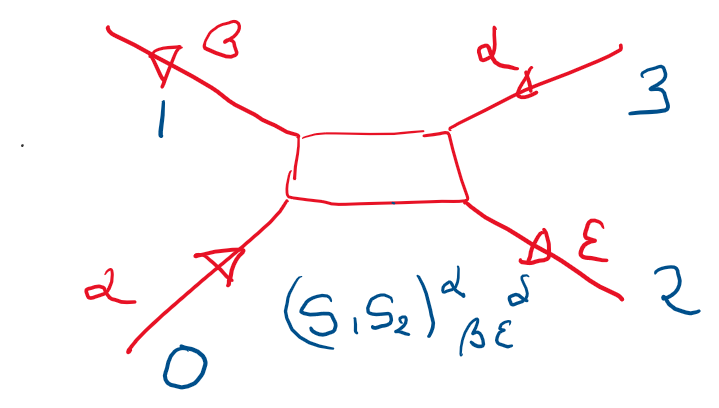

Donde hemos renumerado los índices una vez realizamos la contracción. Cabe destacar que los índices $\alpha$ y $\beta$ siempre iterarán sobre eleemntos de $\vec{S}_1$ mientras $\epsilon$ y $\delta$ iterarán sobre elementos de $\vec{S}_2^{\dagger}$

El tensor de rank-4 $(S_1S_2)^{\alpha}\,_{\beta \epsilon}\,^{\gamma}$ aún no es la solución que buscamos ya que la ordenación no será la deseada. Esto se puede ver convirtiendo el tensor en una matriz con la siguiente ordenación:

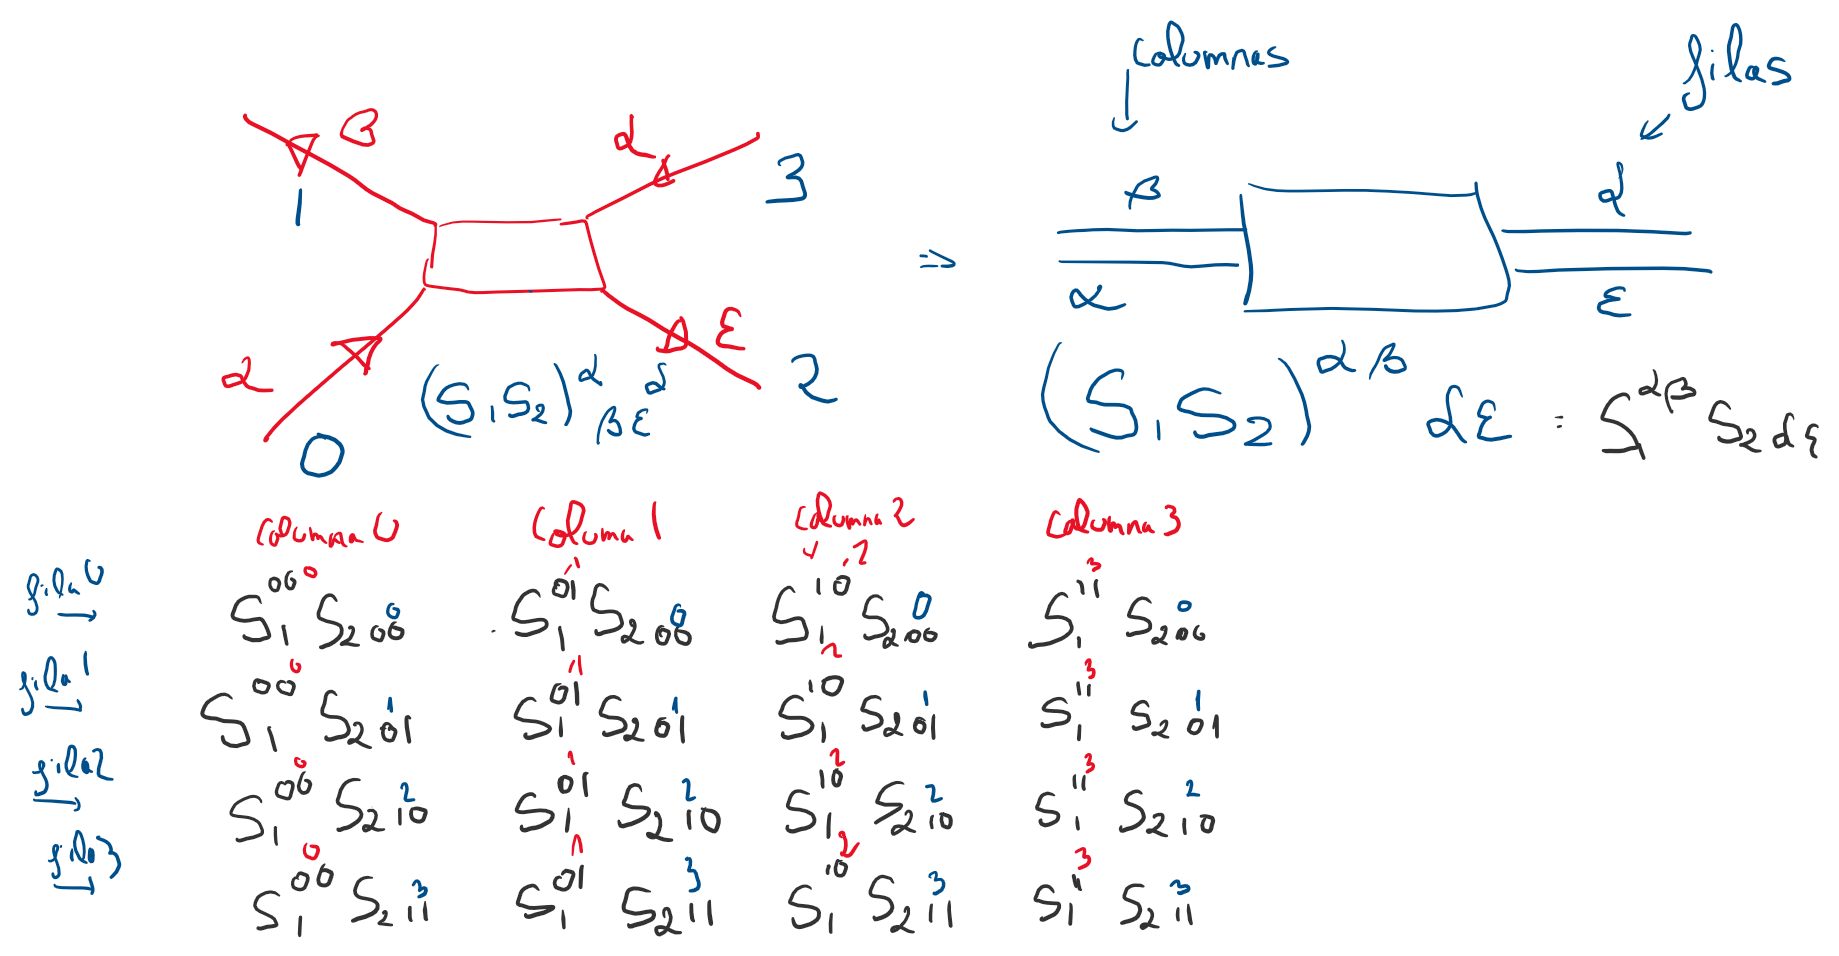

Pero nosotros necesitamos un producto de Kronecker conformado por elementos del sitio 1 y del sitio 2. Es decir nosotros necesitamos:

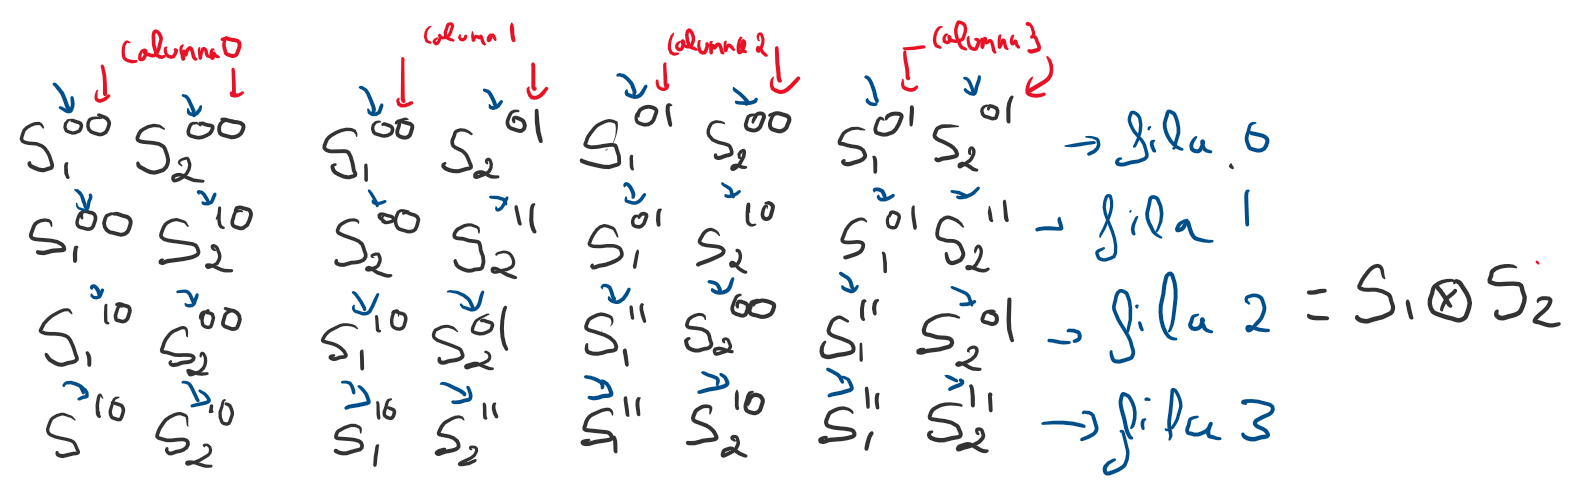

Es decir en nuestra contraccion $(S_1S_2)^{\alpha}\,_{\beta \epsilon}\,^{\gamma}$ necesitamos que $\beta$ y $\gamma$ formen parte de las columnas y $\alpha$ y $\epsilon$ formen parte de las filas. Es decir:

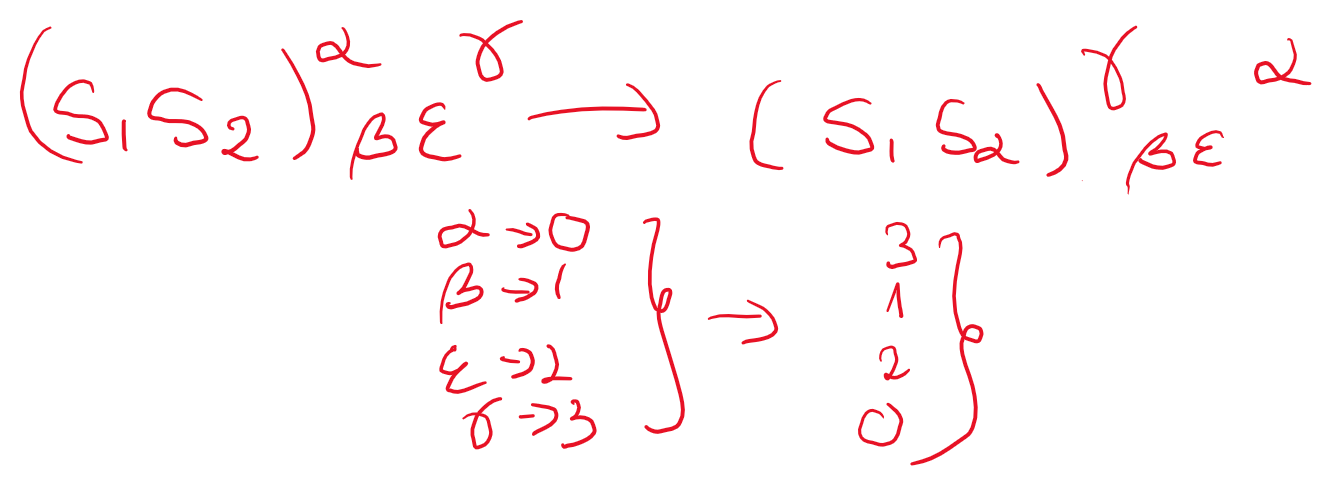

In [ ]:
import sys
sys.path.append('../../')
from tensornetworks import contract_indices

In [ ]:
#Sz
s_z = 0.5 *  np.array([[1, 0], [0, -1]])
#S+
s_c = (1.0/np.sqrt(2)) * np.array([[0, 1.0], [0 ,0]] )
# tensor spinor: S
t_spinor = np.array([S_plus, S_z, S_plus.T])

In [ ]:
# La contraccion es S1 * S2.T
t_s1s2 = contract_indices(t_spinor, t_spinor.T, [0], [2])
# Necesitamos permutar para obetner el tensor deseado
t_s1s2 = t_s1s2.transpose((3, 1, 2, 0))

In [ ]:
t_s1s2.shape

In [ ]:
Matrix(t_s1s2.reshape(4,4))

In [ ]:
Matrix(S1S2)

In [ ]:
np.isclose(t_s1s2.reshape(4,4), S1S2).all()

Hasta aquí he convertido el cálculo de $\vec{S}_1 \vec{S}_2$ en una contracción de los Spinores del sitio 1 el sitio 2: 

$$(\vec{S}_1)^{\alpha}_{\beta\gamma}(\vec{S}_2)_{\epsilon}^{\delta \gamma}$$

¿ Cómo puedo incorporar a mi claculo la identidad del tercer sitio? 

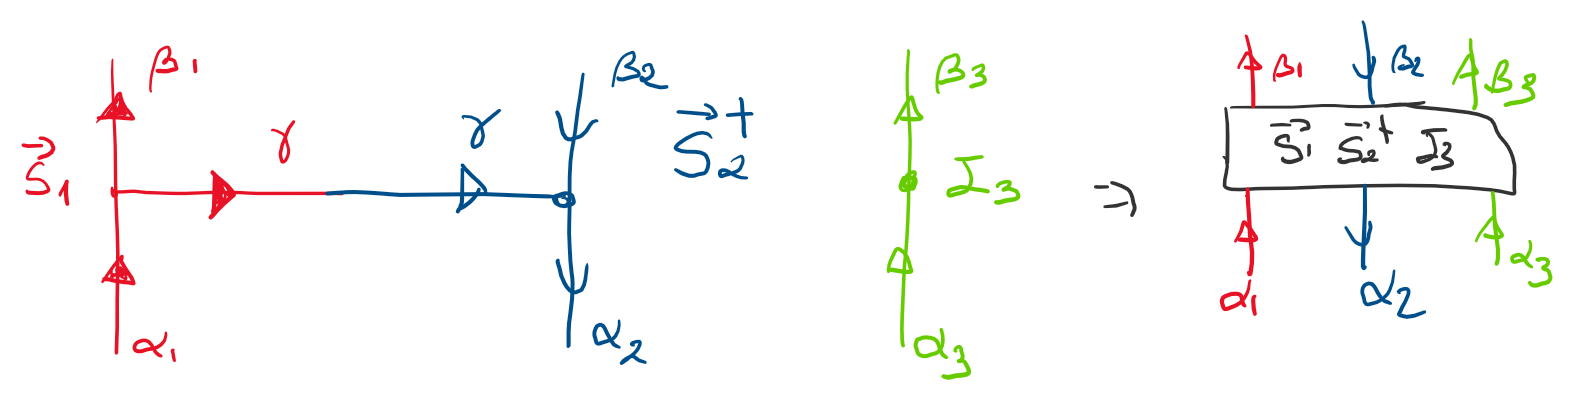


In [ ]:
#identidad
i = np.identity(2)

In [ ]:
ts1s2i3 = contract_indices(t_s1s2, i)
ts1s2i3 = ts1s2i3.transpose(0,1,5,2,3,4)

In [ ]:
(ts1s2i3.reshape(8,8) == S1S2I3).all()

Esa pregunta también aplica en el caso que tengamos que calcular $\vec{S}_1 \vec{S}_3$ pero en este caso la identidad se tiene que aplicar en el sitio 2.

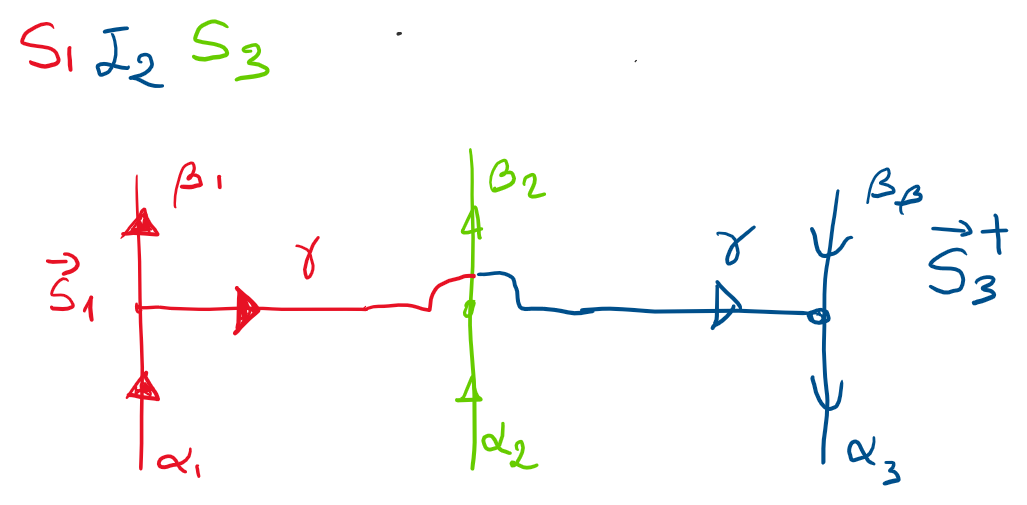

In [ ]:
t_S1I2 = contract_indices(t_spinor, i, [], [])
t_S1I2 = t_S1I2.transpose((0, 1, 4, 2, 3))

In [ ]:
final = t_S1I2.reshape(3, 4, 4)

In [ ]:
(final[0] == np.kron(S_plus, np.identity(2))).all()

In [ ]:
(final[1] == np.kron(S_z, np.identity(2))).all()

In [ ]:
(final[2] == np.kron(S_less, np.identity(2))).all()

In [ ]:
t_S1I2.shape

In [ ]:
t_S1I2S3 = contract_indices(t_S1I2, t_spinor.T, [0], [2])
t_S1I2S3 = t_S1I2S3.transpose((0, 1, 4, 2, 3, 5))

In [ ]:
(t_S1I2S3.reshape(8,8) == S1I2S3).all()

In [ ]:
t_I1S2 = contract_indices(i, t_spinor, [], [])
t_I1S2 = t_I1S2.transpose((2, 0, 3, 1, 4))

In [ ]:
final = t_I1S2.reshape(3, 4, 4)

In [ ]:
(final[0] == np.kron(np.identity(2), S_plus)).all()

In [ ]:
(final[1] == np.kron(np.identity(2), S_z)).all()

In [ ]:
(final[2] == np.kron(np.identity(2), S_less)).all()

In [ ]:
t_I1S2.shape

In [ ]:
t_I1S2S3 = contract_indices(t_I1S2, t_spinor.T, [0], [2])
t_I1S2S3 = t_I1S2S3.transpose(0, 1, 4, 2, 3, 5)

In [ ]:
(t_I1S2S3.reshape(8,8) == I1S2S3).all()

In [ ]:
H = t_I1S2S3 + t_S1I2S3 + ts1s2i3

In [ ]:
np.linalg.eigvals(H.reshape(8,8))